# INTRO.

This Notebook contains my solution for the [Cryptocurrency Price Prediction Challenge](https://bitgrit.net/competition/20#). Kudos to the Bitgrit team for bringing us such an amazing challenge in the Web 3.0 space.


# The Data

The data used are the official data set as given in the resources folder.

- The Train set
- The Test set
- The sample submission format

# Environment
As my local machine resources are limited, this notebook was run on kaggle kennel to leverage the free and available resources.

- CPU ONLY. No GPU is needed.

In [3]:
import numpy as np # Numpy for numerical operations
import pandas as pd #Pandas for tabular operat`ions
from catboost import CatBoostRegressor #Catboost for Modelling


import seaborn as sns # Seaborn for Plots
import matplotlib.pyplot as plt #Matplotlib for plots and visualizations
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

In [4]:
train = pd.read_csv("/kaggle/input/bitgrit-crypto/train.csv")
test = pd.read_csv("/kaggle/input/bitgrit-crypto/test.csv")
ss = pd.read_csv("/kaggle/input/bitgrit-crypto/solution_format.csv")

In [5]:
target = train.Target

In [6]:
train.tail()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3,Target
2655,2656,NaN,NaN,NaN,1.0,0.026,0.0,0.0,0.0,0.005,...,0.0,1.0,1,0.034,0.701073,-0.009556,NaN,NaN,NaN,0
2656,2657,NaN,NaN,NaN,1.0,0.009,0.0,1.0,0.0,0.006,...,0.0,0.0,1,0.114,0.283565,1.861150,NaN,NaN,NaN,1
2657,2658,NaN,NaN,NaN,0.0,0.016,0.0,1.0,1.0,0.004,...,1.0,2.0,0,0.035,-0.817023,-0.410857,NaN,NaN,NaN,0
2658,2659,NaN,NaN,NaN,1.0,0.072,0.0,0.0,0.0,0.018,...,0.0,0.0,1,0.022,1.312880,-0.923908,NaN,NaN,NaN,1
2659,2660,NaN,NaN,NaN,1.0,0.031,0.0,1.0,1.0,0.008,...,0.0,1.0,1,0.045,2.084196,0.533945,1.0,0.0,20.0,0


In [7]:
test.tail()

,ID,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
661,3322,NaN,NaN,NaN,0.0,0.025,0.0,0.0,0.0,0.009,...,NaN,0.0,0.0,0,0.041,0.260899,-0.494080,NaN,NaN,NaN
662,3323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.077,1.660683,-0.067781,NaN,NaN,NaN
663,3324,NaN,NaN,NaN,0.0,0.019,0.0,0.0,0.0,0.009,...,4.569500,0.0,0.0,0,0.026,1.084864,0.078614,NaN,NaN,NaN
664,3325,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,1,0.020,0.280929,-1.747897,NaN,NaN,NaN
665,3326,NaN,NaN,NaN,1.0,0.020,0.0,0.0,0.0,0.005,...,2.767643,0.0,0.0,0,0.007,-0.511399,-0.818952,NaN,NaN,NaN


In [8]:
df = pd.concat([train.drop(["Target", "ID"], axis=1), test.drop("ID", axis=1)])
df.tail()

,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
661,NaN,NaN,NaN,0.0,0.025,0.0,0.0,0.0,0.009,1.233976,...,NaN,0.0,0.0,0,0.041,0.260899,-0.494080,NaN,NaN,NaN
662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.077,1.660683,-0.067781,NaN,NaN,NaN
663,NaN,NaN,NaN,0.0,0.019,0.0,0.0,0.0,0.009,0.329421,...,4.569500,0.0,0.0,0,0.026,1.084864,0.078614,NaN,NaN,NaN
664,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0.020,0.280929,-1.747897,NaN,NaN,NaN
665,NaN,NaN,NaN,1.0,0.020,0.0,0.0,0.0,0.005,-0.758024,...,2.767643,0.0,0.0,0,0.007,-0.511399,-0.818952,NaN,NaN,NaN


In [9]:
df.isnull().sum()

TR_1_EventInd    3240
TR_2_EventInd    3254
TR_3_EventInd    3198
feature_10_A      558
feature_10_B     1037
                 ... 
feature_X_C         0
feature_X_D         0
index_1          3217
index_2          3217
index_3          3217
Length: 76, dtype: int64

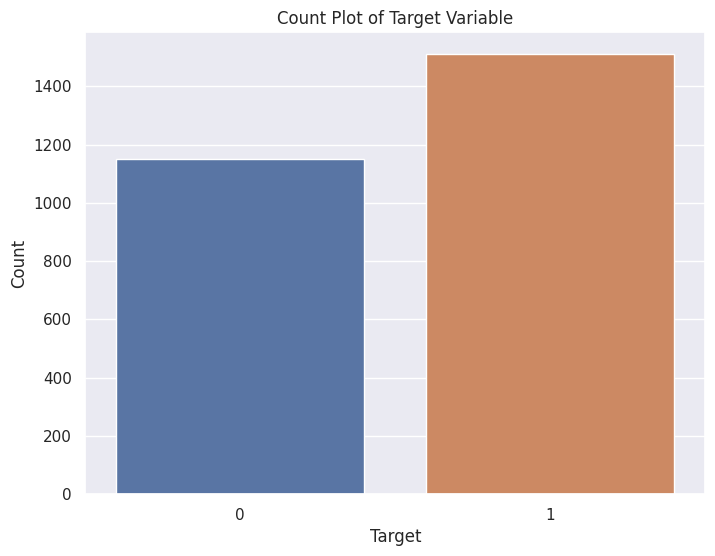

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the name of your DataFrame and 'target' is the name of your target variable
sns.set(style="darkgrid")  # Setting the style for the plot
plt.figure(figsize=(8, 6))  # Setting the size of the plot

# Creating the count plot
sns.countplot(data=train, x='Target')

# Adding labels and title
plt.title('Count Plot of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()  # Display the plot


In [12]:
df.describe()

,TR_1_EventInd,TR_2_EventInd,TR_3_EventInd,feature_10_A,feature_10_B,feature_10_F,feature_10_G,feature_1_A,feature_1_B,feature_1_C,...,feature_9_E,feature_9_F,feature_9_G,feature_X_A,feature_X_B,feature_X_C,feature_X_D,index_1,index_2,index_3
count,86.0,72.0,128.0,2768.000000,2289.000000,2768.0,2768.000000,2291.000000,2291.000000,2286.000000,...,2159.000000,2290.000000,2290.000000,3326.000000,3326.000000,3326.000000,3326.000000,109.000000,109.000000,109.000000
mean,1.0,1.0,1.0,0.392341,0.028023,0.0,0.458092,0.486251,0.008274,0.087925,...,3.983680,0.380349,0.894323,0.531870,0.044206,0.216083,0.041461,1.064220,7.422018,16.743119
std,0.0,0.0,0.0,0.488360,0.024544,0.0,0.791886,0.499920,0.004709,1.251985,...,1.467964,0.485579,1.361716,0.499058,0.037152,1.257359,1.062054,1.594407,16.947792,18.459367
min,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002000,-3.217639,...,1.842286,0.000000,0.000000,0.000000,0.003000,-3.360669,-2.381170,0.000000,0.000000,0.000000
25%,1.0,1.0,1.0,0.000000,0.015000,0.0,0.000000,0.000000,0.005000,-0.941272,...,2.500786,0.000000,0.000000,0.000000,0.019000,-0.782940,-0.730676,0.000000,0.000000,6.000000
50%,1.0,1.0,1.0,0.000000,0.022000,0.0,0.000000,0.000000,0.007000,0.124459,...,3.876714,0.000000,0.000000,1.000000,0.034000,0.265084,-0.123095,0.000000,0.000000,13.000000
75%,1.0,1.0,1.0,1.000000,0.033000,0.0,1.000000,1.000000,0.010000,1.101055,...,5.152536,1.000000,1.000000,1.000000,0.056000,1.244555,0.674408,2.000000,7.000000,20.000000
max,1.0,1.0,1.0,1.000000,0.419000,0.0,4.000000,1.000000,0.054000,2.955631,...,7.257000,1.000000,12.000000,1.000000,0.388000,3.378024,3.405693,7.000000,100.000000,100.000000


In [13]:
# Separate train and test data from the combined dataframe
df_train = df[:train.shape[0]]
df_test = df[train.shape[0]:]

X = df_train
y = target

# Check the shapes of the split dataset
df_train.shape, df_test.shape

((2660, 76), (666, 76))

#### How did I obtain this feature list?

I ran a baseline XGBoost model and obtained the feature importance from there. I'll add this Notebook to the folder and name it. baseline.

In [14]:
sfi = ['feature_6_E',
 'feature_2_E',
 'feature_9_E',
 'feature_7_E',
 'feature_8_E',
 'feature_5_E',
 'feature_3_E',
 'feature_1_E',
 'feature_6_F',
 'feature_4_E',
 'feature_1_F',
 'feature_5_F',
 'feature_8_F',
 'feature_3_F',
 'TR_2_EventInd',
 'feature_6_C',
 'feature_4_C',
 'feature_2_F',
 'index_1',
 'feature_5_C',
 'feature_8_G',
 'feature_9_F',
 'feature_1_C',
 'feature_7_F',
 'feature_3_B',
 'feature_X_C',
 'feature_X_B',
 'feature_8_D',
 'TR_3_EventInd',
 'feature_3_C',
 'feature_9_A',
 'feature_7_C',
 'feature_2_C',
 'feature_9_C',
 'feature_6_D',
 'feature_7_D',
 'feature_5_D',
 'index_3',
 'feature_X_D',
 'feature_9_G',
 'feature_3_D',
 'feature_8_B',
 'feature_2_B',
 'feature_7_B',
 'index_2',
 'feature_8_C',
 'feature_3_A',
 'feature_4_G',
 'feature_6_B',
 'feature_7_G',
 'feature_1_G',
 'feature_9_B',
 'feature_10_B',
 'feature_5_B',
 'feature_2_D',
 'feature_4_B',
 'feature_4_F',
 'feature_9_D',
 'feature_2_G',
 'feature_5_G',
 'feature_4_A',
 'feature_10_G',
 'feature_3_G',
 'feature_8_A',
 'feature_1_D',
 'feature_1_B',
 'feature_10_A',
 'feature_X_A',
 'feature_7_A',
 'feature_2_A',
 'feature_1_A',
 'TR_1_EventInd',
 'feature_6_G',
 'feature_6_A',
 'feature_5_A',
 'feature_10_F']

In [15]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


predictions = []
scores = []
i=0

params = {'learning_rate': 0.013287326810543917, 'subsample': 0.9824066311129094, 'colsample_bytree': 0.41798598387594105, 'max_depth': 13, 'scale_pos_weight': 2, 'n_estimators': 543}

top_n = 30

fold=StratifiedKFold(n_splits=20,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index][sfi[:top_n]], X.iloc[test_index][sfi[:top_n]]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2 = XGBClassifier(**params)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    score = f1_score(Y_test,preds)
    scores.append(score)
    print("F1: ", score) 
    predictions.append(classifier2.predict_proba(df_test[X_test.columns]))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

F1:  0.8433734939759036
F1:  0.811764705882353
F1:  0.7831325301204819
F1:  0.8165680473372782
F1:  0.8156424581005587
F1:  0.8284023668639054
F1:  0.7771428571428572
F1:  0.811764705882353
F1:  0.8068181818181819
F1:  0.8156424581005587
F1:  0.8160919540229886
F1:  0.8313253012048194
F1:  0.7976878612716762
F1:  0.8214285714285714
F1:  0.7857142857142858
F1:  0.8220858895705521
F1:  0.8383233532934132
F1:  0.7885714285714287
F1:  0.8284023668639053
F1:  0.8342857142857143
0.8137084265725892


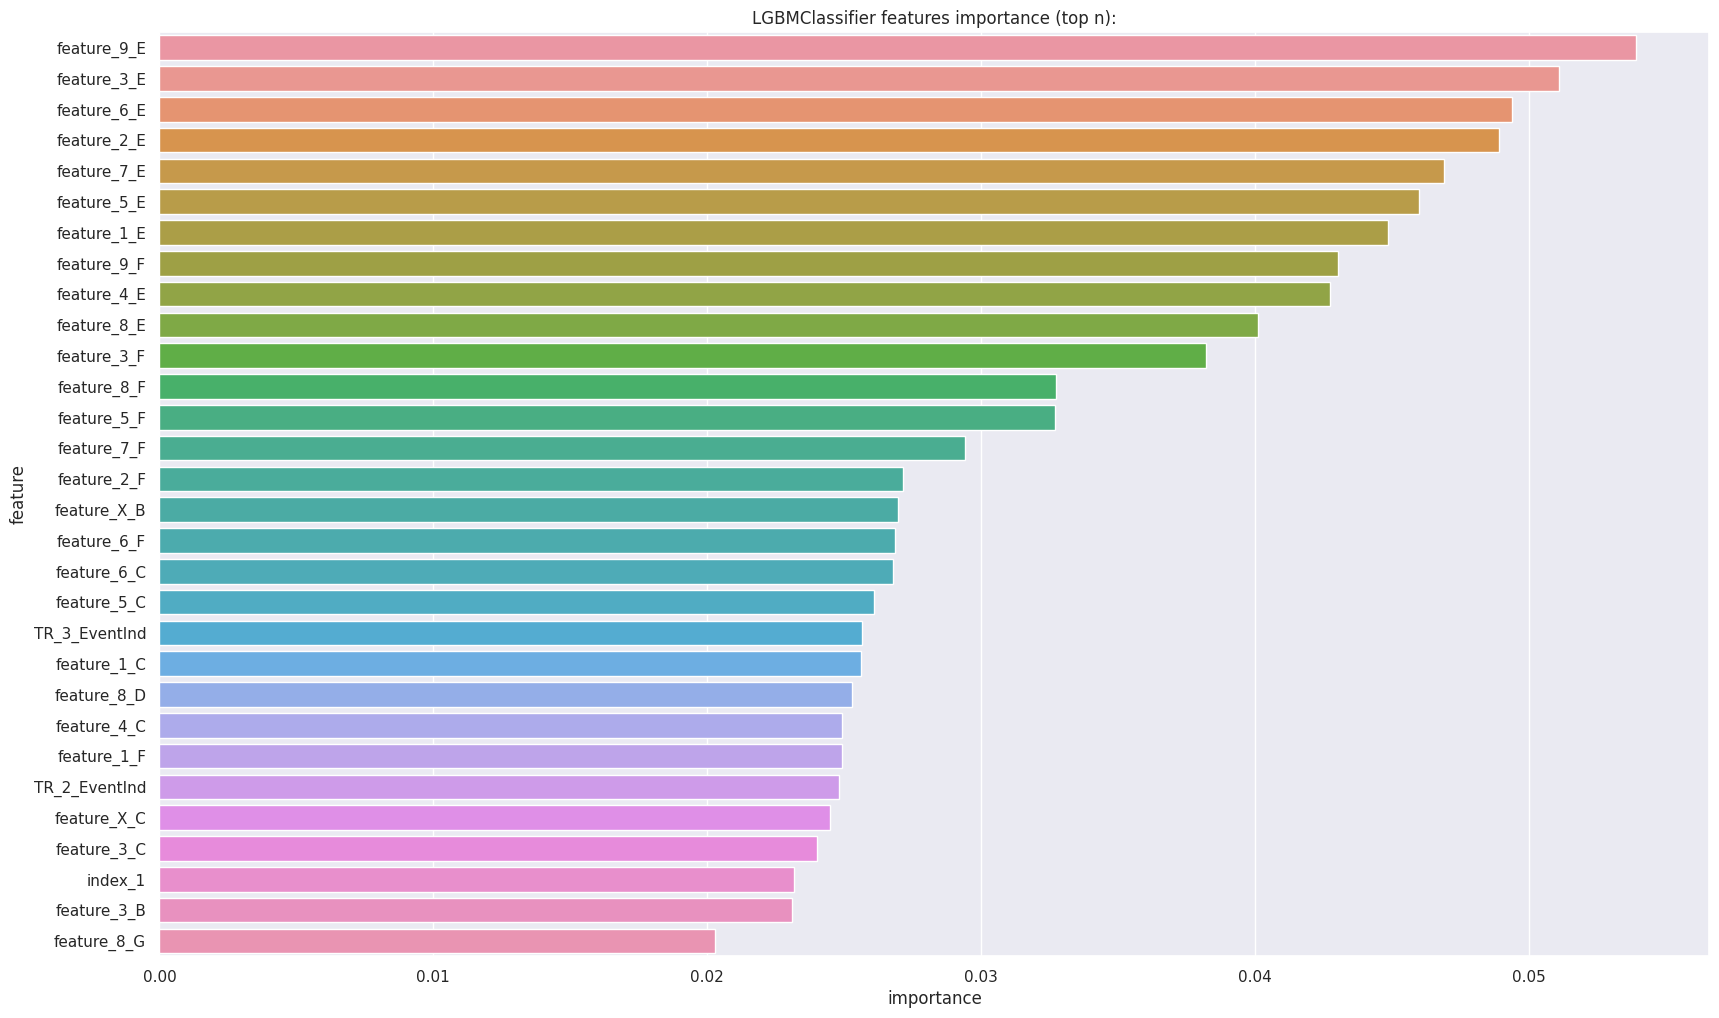

In [16]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [17]:
sub = ss.copy()
sub.head()

,ID,Target
0,2661,1
1,2662,1
2,2663,1
3,2664,1
4,2665,1


In [18]:
ans = [[x[1] for x in y] for y in predictions]

In [19]:
# predictions_ = pd.DataFrame(predictions)
predictions_ = pd.DataFrame(ans)
predictions_.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.911917,0.907302,0.933211,0.927285,0.913720,0.854896,0.918976,0.913391,0.902685,0.901055,0.915668,0.851339,0.828501,0.983634,0.957925,0.874322,0.930032,0.892544,0.887297,0.911242
1,0.967337,0.960975,0.972868,0.975542,0.970506,0.969313,0.969820,0.976295,0.969726,0.974540,0.967542,0.975154,0.976751,0.977303,0.965099,0.975083,0.963703,0.970865,0.961720,0.970518
2,0.837723,0.797416,0.822007,0.831144,0.847203,0.876015,0.787413,0.861829,0.857985,0.807352,0.824103,0.843001,0.852874,0.771804,0.878077,0.772650,0.779354,0.811409,0.832088,0.849420
3,0.949891,0.960019,0.947029,0.957162,0.939381,0.944200,0.944935,0.966827,0.959465,0.959764,0.963908,0.955694,0.962029,0.960923,0.946698,0.958818,0.957439,0.959960,0.953991,0.944083
4,0.882511,0.861678,0.875312,0.873359,0.903803,0.880615,0.855853,0.894469,0.890964,0.866922,0.882911,0.879345,0.848783,0.877938,0.910723,0.883216,0.869689,0.939964,0.842787,0.873516


In [20]:
predictions = predictions_.mean()
predictions

0      0.905847
1      0.970533
2      0.827043
3      0.954611
4      0.879718
         ...   
661    0.718950
662    0.892798
663    0.967143
664    0.604944
665    0.926439
Length: 666, dtype: float32

In [34]:
def thresh(x):
    if x>0.45:
        return(1)
    else:
        return(0)

In [35]:
predictions.apply(thresh).value_counts()

1    520
0    146
Name: count, dtype: int64

In [37]:
train.Target.value_counts()

Target
1    1510
0    1150
Name: count, dtype: int64

In [38]:
sub["Target"] = predictions.apply(thresh)
sub.head()

,ID,Target
0,2661,1
1,2662,1
2,2663,1
3,2664,1
4,2665,1


In [39]:
name = "thresh 0.45 best on 20 folds.csv"
sub.to_csv(name, index=False)

How did i obtain my hyperparameters?

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# # X = train.copy()

# from lightgbm import early_stopping, log_evaluation
# from sklearn.model_selection import StratifiedKFold
# from lightgbm import LGBMClassifier
# from lightgbm import early_stopping, log_evaluation
# from sklearn.metrics import f1_score

# def objective(trial):
#     fold_pred=[]
#     oof_pred = []


#     param = {}
#     #param['objective'] = "binary"

#     param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
#      #param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
#      #param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
#     param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
#     param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
#     param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
#     param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1,2)
#     param['n_estimators'] = trial.suggest_int('n_estimators', 400,1200)
#     param['verbose'] = 0
#     top_n = 30




#     fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=42) #15#5#10 
#     i=1
#     for train_index, test_index in fold.split(X,y):
        
#         X_train, X_test = X.iloc[train_index][sfi[:top_n]], X.iloc[test_index][sfi[:top_n]]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         # m2 = CatBoostRegressor(**param)
#         m2 = XGBClassifier(**param)
#         #m2 = LGBMClassifier(**param)

#         #m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], callbacks=[log_evaluation(1200)])#erly100
#         m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], verbose=False)
#         preds=m2.predict(X_test)
#         oof_pred.append(f1_score(y_test,preds))

#     return np.mean(oof_pred)


In [ ]:
# !pip install optuna -qq

In [ ]:
# import optuna

In [ ]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=2000)

Thanks for reviewing my solution. I am always open to conversations and talks centered around Machine learning and Deep learning. Please Feel free to reach out to me anytime.

. [Twitter](https://twitter.com/Osinkoluolufemi).

. [Linkedin](https://www.linkedin.com/in/olufemi-victor-tolulope).

. [Github](https://github.com/osinkolu)

. [Email](mailto:femiosinkolu@gmail.com)

### Author: Olufemi Victor Tolulope